In [125]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import random

import scipy
from scipy import stats

import seaborn as sb
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib as plt

In [20]:
a = np.array([[1,2,6],[2,3,3],[3,4,0]]) # thus it's a matrix
a

array([[1, 2, 6],
       [2, 3, 3],
       [3, 4, 0]])

In [21]:
b = np.array([[1,2,3],[6,9,3],[1.5, 4.6, 9.9]])
a*b                                     # it is a product of matrices

array([[ 1. ,  4. , 18. ],
       [12. , 27. ,  9. ],
       [ 4.5, 18.4,  0. ]])

In [22]:
np.dot(a, b)   # this is a dot product 点积 

array([[22. , 47.6, 68.4],
       [24.5, 44.8, 44.7],
       [27. , 42. , 21. ]])

In [24]:
b.max()

9.9

In [27]:
df = pd.read_csv('B1.csv')

In [30]:
df.height.max()

640.0

In [29]:
df.height.idxmax()   # get the index id of the max

2367

In [31]:
df.mean()

Unnamed: 0    1638.500000
height          63.996211
width          155.357594
aratio           3.913182
local            0.767086
class            0.859671
dtype: float64

In [33]:
df.groupby('class').mean()

,Unnamed: 0,height,width,aratio,local
class,,,,,
0,229.5,67.285714,324.402597,5.628313,0.775824
1,1868.5,63.359799,122.685743,3.580189,0.765670


In [43]:
df.var()

Unnamed: 0    895713.500000
height          2181.108309
width          16915.140592
aratio            36.529524
local              0.178720
class              0.120674
dtype: float64

In [52]:
df.local.value_counts()

1.0    2503
0.0     760
Name: local, dtype: int64

In [55]:
ff = df.describe()
ff

,Unnamed: 0,height,width,aratio,local,class
count,3278.000000,3278.000000,2377.000000,2368.000000,3263.000000,3278.000000
mean,1638.500000,63.910721,155.357594,3.913182,0.767086,0.859671
std,946.421418,46.702337,130.058220,6.043966,0.422753,0.347382
min,0.000000,1.000000,1.000000,0.001500,0.000000,0.000000
25%,819.250000,32.250000,80.000000,1.036675,1.000000,1.000000
50%,1638.500000,63.359799,110.000000,2.106550,1.000000,1.000000
75%,2457.750000,67.285714,184.000000,5.333300,1.000000,1.000000
max,3277.000000,640.000000,640.000000,60.000000,1.000000,1.000000


In [56]:
ff.index = ff.height  # set a certain column as the index of rows
ff

,Unnamed: 0,height,width,aratio,local,class
height,,,,,,
3278.000000,3278.000000,3278.000000,2377.000000,2368.000000,3263.000000,3278.000000
63.910721,1638.500000,63.910721,155.357594,3.913182,0.767086,0.859671
46.702337,946.421418,46.702337,130.058220,6.043966,0.422753,0.347382
1.000000,0.000000,1.000000,1.000000,0.001500,0.000000,0.000000
32.250000,819.250000,32.250000,80.000000,1.036675,1.000000,1.000000
63.359799,1638.500000,63.359799,110.000000,2.106550,1.000000,1.000000
67.285714,2457.750000,67.285714,184.000000,5.333300,1.000000,1.000000
640.000000,3277.000000,640.000000,640.000000,60.000000,1.000000,1.000000


In [57]:
dfg = df.groupby('class')
dfg.describe()

Unnamed: 0                                                               \
           count    mean         std    min      25%     50%      75%     max   
class                                                                           
0          460.0   229.5  132.934821    0.0   114.75   229.5   344.25   459.0   
1         2818.0  1868.5  813.630854  460.0  1164.25  1868.5  2572.75  3277.0   

       height             ...  aratio         local                           \
        count       mean  ...     75%   max   count      mean       std  min   
class                     ...                                                  
0       460.0  67.285714  ...  7.8000  19.5   455.0  0.775824  0.417497  0.0   
1      2818.0  63.359799  ...  4.3448  60.0  2808.0  0.765670  0.423655  0.0   

                           
       25%  50%  75%  max  
class                      
0      1.0  1.0  1.0  1.0  
1      1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

### Transform data type

In [67]:
df['group'] = pd.Series(df.local, dtype='category')

In [60]:
df['local'].dtypes

dtype('float64')

In [62]:
df['group'].dtypes

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [63]:
df['group'].value_counts()

1.0    2503
0.0     760
Name: group, dtype: int64

In [64]:
df['local'].value_counts()

1.0    2503
0.0     760
Name: local, dtype: int64

In [65]:
df['class'].dtypes

dtype('int64')

### Contingency table or crosstab

In [68]:
pd.crosstab(df['class'],df['group'])

group,0.0,1.0
class,,
0,102,353
1,658,2150


### The Pearson Correlation

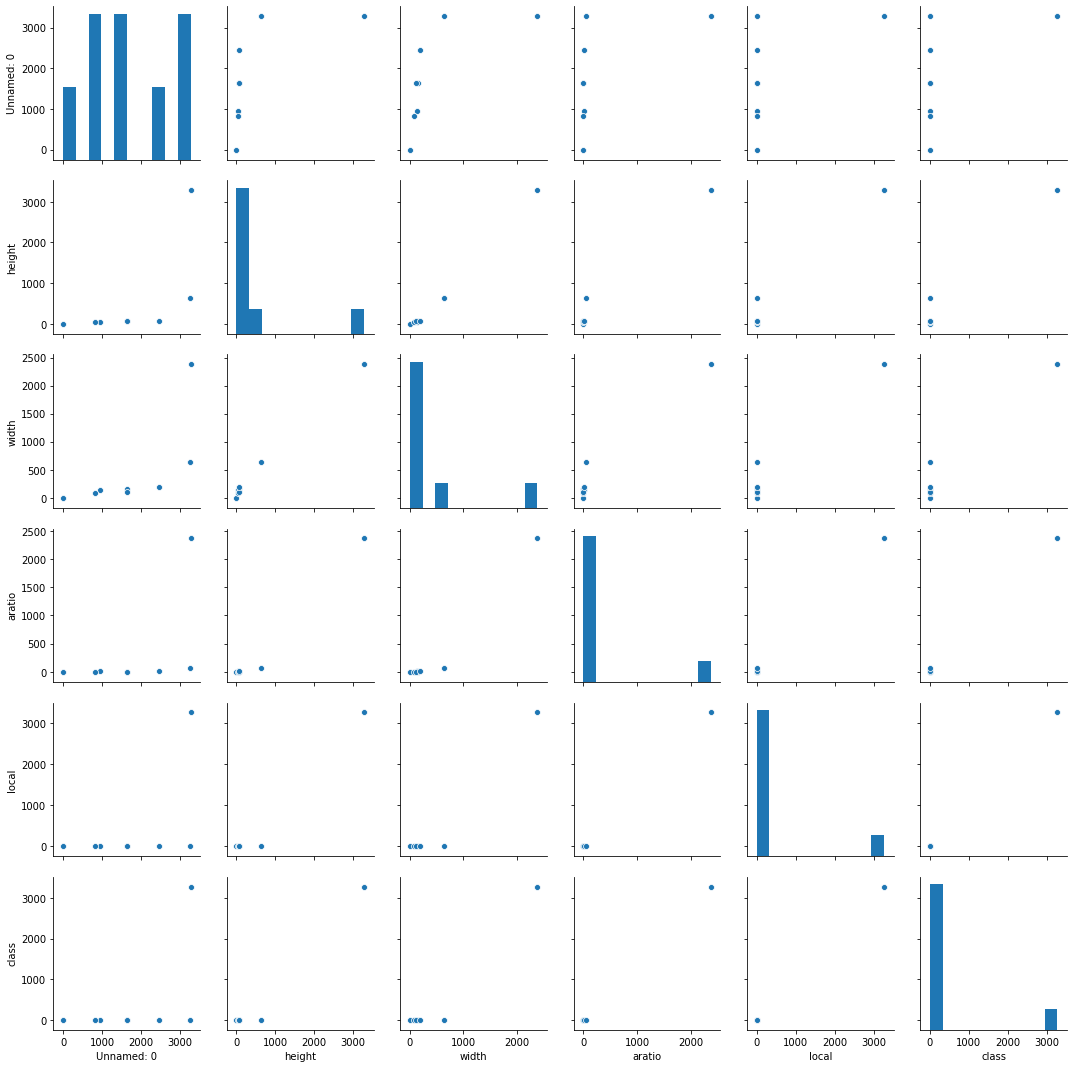

In [72]:
sb.pairplot(ff)

In [79]:
pearson_coefficient, p_value = pearsonr(ff['height'],ff['width'])
pearson_coefficient

0.9974565679915983

In [80]:
p_value

4.1055522938060005e-08

In [88]:
ff.corr()

,Unnamed: 0,height,width,aratio,local,class
Unnamed: 0,1.000000,0.632492,0.682196,0.535472,0.520524,0.520528
height,0.632492,1.000000,0.997457,0.986942,0.982825,0.982825
width,0.682196,0.997457,1.000000,0.975681,0.970303,0.970303
aratio,0.535472,0.986942,0.975681,1.000000,0.999714,0.999714
local,0.520524,0.982825,0.970303,0.999714,1.000000,1.000000
class,0.520528,0.982825,0.970303,0.999714,1.000000,1.000000


### The Spearman Rank Correlation

In [92]:
spearmanr(ff['height'],ff['width'])

SpearmanrResult(correlation=0.9761904761904763, pvalue=3.3143960262001043e-05)

### Chi square test for independence

In [94]:
from scipy.stats import chi2_contingency

In [98]:
table = pd.crosstab(df['class'],df['group'])


In [99]:
table

group,0.0,1.0
class,,
0,102,353
1,658,2150


In [104]:
chi2_contingency(table.values)  # the results are: chi2 (badness), p-value, dof, expected

(0.17272361051380528,
 0.6777025061072457,
 1,
 array([[ 105.97609562,  349.02390438],
        [ 654.02390438, 2153.97609562]]))

In [109]:
chi2_contingency(table.values)[1] # get the second result

0.6777025061072457

### Outliers Analysis

In [121]:
df = df.drop('Unnamed: 0',axis=1)


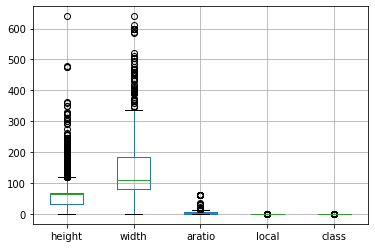

In [132]:
df.boxplot()


In [134]:
h = df['height']
h_o = (h > 120)
df[h_o]

,height,width,aratio,local,class,group
16,125.0,125.0,1.0000,1.0,0,1.0
43,125.0,125.0,1.0000,1.0,0,1.0
47,125.0,125.0,1.0000,1.0,0,1.0
54,125.0,125.0,1.0000,1.0,0,1.0
69,125.0,125.0,1.0000,0.0,0,0.0
...,...,...,...,...,...,...
3243,136.0,150.0,1.1029,1.0,1,1.0
3261,150.0,200.0,1.3333,1.0,1,1.0
3263,134.0,184.0,1.3731,0.0,1,0.0
3266,158.0,192.0,1.2151,1.0,1,1.0


In [136]:
pd.options.display.float_format = '{:.1f}'.format   # to control the float number displayed
df.describe()

,height,width,aratio,local,class
count,3278.0,2377.0,2368.0,3263.0,3278.0
mean,63.9,155.4,3.9,0.8,0.9
std,46.7,130.1,6.0,0.4,0.3
min,1.0,1.0,0.0,0.0,0.0
25%,32.2,80.0,1.0,1.0,1.0
50%,63.4,110.0,2.1,1.0,1.0
75%,67.3,184.0,5.3,1.0,1.0
max,640.0,640.0,60.0,1.0,1.0


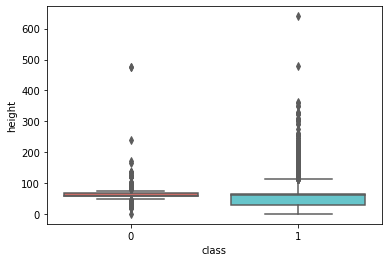

In [139]:
sb.boxplot(x='class', y='height', data=df, palette='hls') # palette 调色板

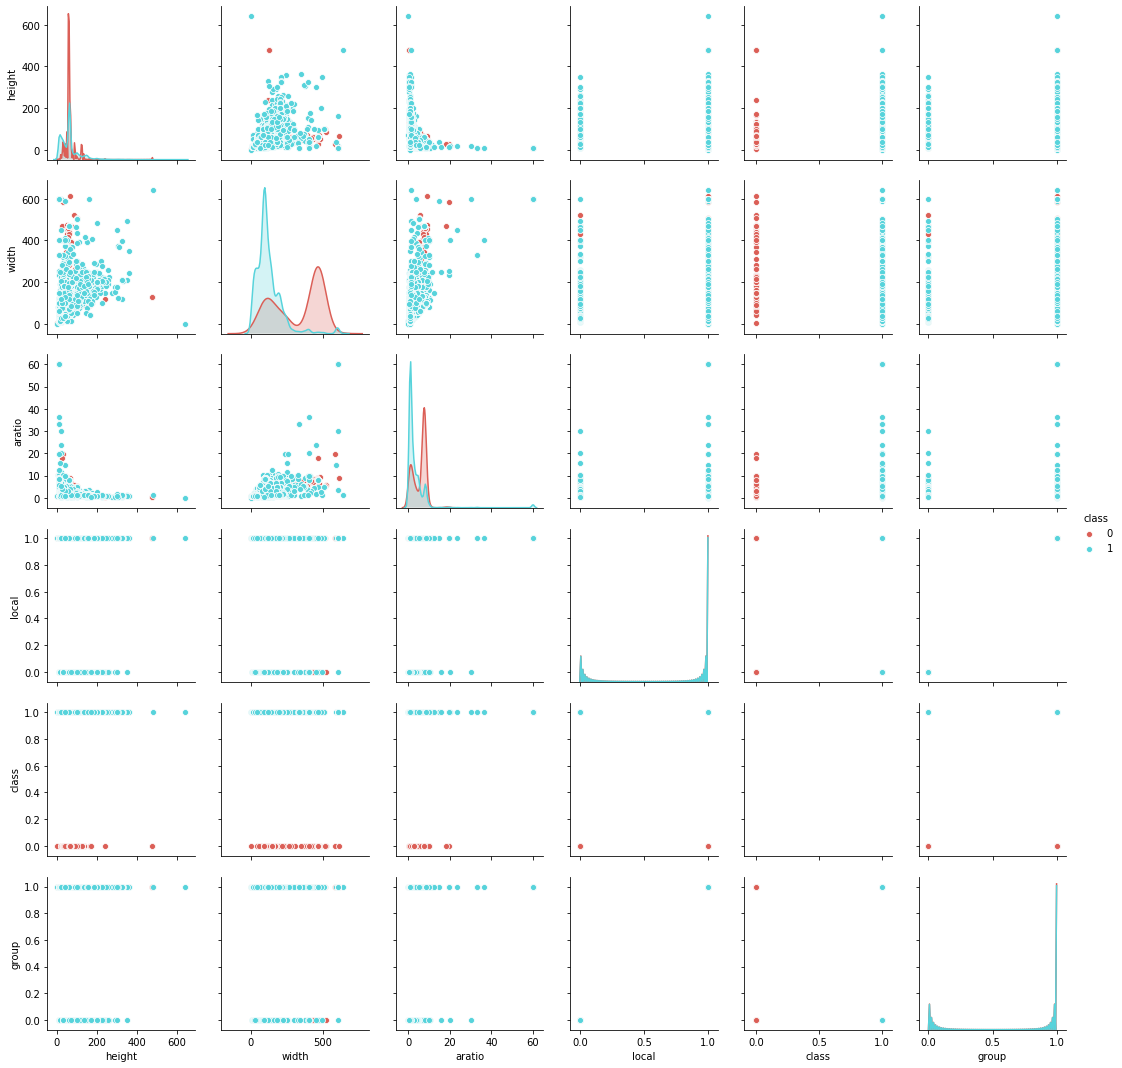

In [142]:
sb.pairplot(df, hue='class', palette='hls')